## EEG RAW DATA EXPLORATION

By: Shateesh Bhugwansing 

data taken from: https://osf.io/j8n4b/ (Early and Late Components of EEG Delay Activity Correlate Differently with Scene Working Memory Performance)

Only downloaded suj11_wml2_day2 files, for EDA 

The MNE library is great because it can read a bunch of different file types, just find the corresponding read_<filetype>() fucntion from their documentation. In this example, I use read_raw_brainvision() to read the .vhdr file. 

In [7]:
import mne
import matplotlib.pyplot as plt
import numpy as np
mne.set_log_level('INFO')

'''
***** NOTE *****
This path variable is only temporary (as of 04/10/18). We are working on setting up a cloud storage space and
a script to access that data virtually
'''
path = "/Users/shateeshbhugwansing/Desktop/seniorprojecteeg/suj11_wml2_day2.vhdr"
raw = mne.io.read_raw_brainvision(path, preload=True)

raw.info

Extracting parameters from /Users/shateeshbhugwansing/Desktop/seniorprojecteeg/suj11_wml2_day2.vhdr...
Setting channel info structure...
Reading 0 ... 1704699  =      0.000 ...  1704.699 secs...


<Info | 17 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | Fp1, Fz, F3, F7, FT9, FC5, FC1, C3, T7, ...
    chs : list | 65 items (EEG: 64, STIM: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : int | 1523543386
    nchan : int | 65
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : No

In [8]:
print(raw.ch_names)

[u'Fp1', u'Fz', u'F3', u'F7', u'FT9', u'FC5', u'FC1', u'C3', u'T7', u'CP5', u'CP1', u'Pz', u'P3', u'P7', u'O1', u'Oz', u'O2', u'P4', u'P8', u'TP10', u'CP6', u'CP2', u'Cz', u'C4', u'T8', u'FT10', u'FC6', u'FC2', u'F4', u'F8', u'Fp2', u'AF7', u'AF3', u'AFz', u'F1', u'F5', u'FT7', u'FC3', u'FCz', u'C1', u'C5', u'TP7', u'CP3', u'P1', u'P5', u'PO7', u'PO3', u'POz', u'PO4', u'PO8', u'P6', u'P2', u'CPz', u'CP4', u'TP8', u'C6', u'C2', u'FC4', u'FT8', u'F6', u'F2', u'LOc', u'ROc', u'Aux1', 'STI 014']


## A segment of Raw Data 

Display all channels from 100 to 115 seconds

(65, 15000)
(15000,)


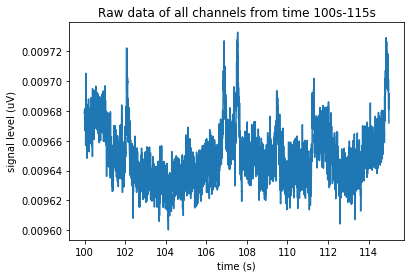

In [9]:
start, stop = raw.time_as_index([100, 115])  # 100 s to 115 s data segment
data, times = raw[:, start:stop]
print(data.shape)
print(times.shape)
data, times = raw[2:20:3, start:stop]  # access underlying data
plt.xlabel('time (s)')
plt.ylabel('signal level (uV)')
plt.title('Raw data of all channels from time 100s-115s')
plt.plot(times, data[1]);

## Individual Channels 

In [10]:
#choosing channels from the raw.ch_names list 
Fz = raw._data[1]
F2 = raw._data[-5]
print(Fz.shape)

(1704700,)


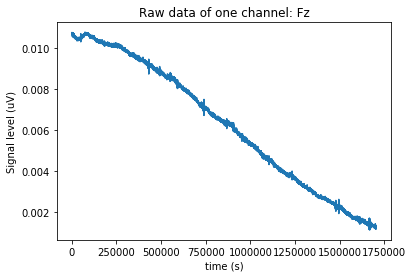

In [12]:
plt.xlabel('time (s)')
plt.ylabel('Signal level (uV)')
plt.title('Raw data of one channel: Fz')
plt.plot(Fz);


In [16]:
type(Fz)

numpy.ndarray

In [19]:
np.amax(Fz)

0.01076162109375